In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

In [94]:
dfbv = pd.read_pickle('bitALL_price_vader_LAST.pkl')

In [95]:
#remove obsolete vars

dfbv = dfbv.drop(columns = ['unix', 'symbol', 'Volume USD'])


In [96]:
# Main frame, use to subset different feature vectors
dfbv

,open,high,low,close,Volume BTC,compound,pos,neu,neg,inf_compound,inf_pos,inf_neu,inf_neg
2022-05-01,37638.78,38672.20,37400.00,38488.34,1248.042690,0.147508,0.101511,0.848716,0.049774,0.076971,0.088519,0.840250,0.071204
2022-04-30,38599.30,38786.95,37597.36,37639.80,728.279620,0.136781,0.103704,0.840366,0.055932,0.054988,0.090798,0.835798,0.073423
2022-04-29,39753.28,39923.61,38174.27,38593.42,1600.899167,0.151327,0.100151,0.854591,0.045256,0.117213,0.091503,0.856665,0.051820
2022-04-28,39254.40,40387.00,38880.44,39754.20,1842.005084,0.161117,0.100433,0.857009,0.042557,0.169852,0.103267,0.852698,0.044041
2022-04-27,38105.68,39494.73,37885.75,39256.05,1769.009307,0.163462,0.105734,0.852099,0.042171,0.159062,0.101624,0.860554,0.037817
2022-04-26,40452.52,40800.00,37701.00,38137.67,2909.722520,0.172319,0.099732,0.861619,0.038647,0.155966,0.086597,0.876149,0.037258
2022-04-25,39464.67,40602.85,38202.91,40441.11,2220.044028,0.165906,0.101994,0.854696,0.043309,0.118110,0.099056,0.844302,0.056652
2022-04-24,39438.51,39944.65,38987.00,39467.40,663.704172,0.197872,0.117816,0.838406,0.043779,0.047342,0.079818,0.858614,0.061602
2022-04-23,39700.55,39983.98,39301.00,39421.59,398.244488,0.192880,0.111704,0.845798,0.042500,0.136664,0.091510,0.858644,0.049851
2022-04-22,40497.00,40808.66,39197.64,39726.03,2136.999771,0.169569,0.104793,0.849929,0.045274,0.181875,0.104627,0.843932,0.051458


In [97]:
#Feature Vectors

#1. All and ONLY price Data
#dfbv = dfbv.drop(columns = ['pos', 'neu', 'neg', 'inf_neg', 'inf_neu', 'inf_pos', 'inf_compound', 'compound' ])

# 2. ONLY MARKET DATA, but without high and low

#dfbv = dfbv.drop(columns = ['pos', 'neu', 'neg', 'inf_neg', 'inf_neu', 'inf_pos', 'inf_compound', 'high', 'low', 'compound'])

##### better results from all market data!!!
#3. All market data & regular compound

#dfbv = dfbv.drop(columns = ['pos', 'neu', 'neg', 'inf_neg', 'inf_neu', 'inf_pos', 'inf_compound'])

#4. All market data and influencer compound

#dfbv = dfbv.drop(columns = ['pos', 'neu', 'neg', 'inf_neg', 'inf_neu', 'inf_pos', 'compound'])

#5.All market data (open, close, high, low, volume) Regular positive, neutral, and negative scores

#dfbv = dfbv.drop(columns = ['inf_neg', 'inf_neu', 'inf_pos', 'compound', 'inf_compound'])


#6. All market data (open, close, high, low, volume) Influencer positive, neutral, and negative scores

dfbv = dfbv.drop(columns = ['neg', 'neu', 'pos', 'compound', 'inf_compound'])



In [98]:
dfbv

,open,high,low,close,Volume BTC,inf_pos,inf_neu,inf_neg
2022-05-01,37638.78,38672.20,37400.00,38488.34,1248.042690,0.088519,0.840250,0.071204
2022-04-30,38599.30,38786.95,37597.36,37639.80,728.279620,0.090798,0.835798,0.073423
2022-04-29,39753.28,39923.61,38174.27,38593.42,1600.899167,0.091503,0.856665,0.051820
2022-04-28,39254.40,40387.00,38880.44,39754.20,1842.005084,0.103267,0.852698,0.044041
2022-04-27,38105.68,39494.73,37885.75,39256.05,1769.009307,0.101624,0.860554,0.037817
2022-04-26,40452.52,40800.00,37701.00,38137.67,2909.722520,0.086597,0.876149,0.037258
2022-04-25,39464.67,40602.85,38202.91,40441.11,2220.044028,0.099056,0.844302,0.056652
2022-04-24,39438.51,39944.65,38987.00,39467.40,663.704172,0.079818,0.858614,0.061602
2022-04-23,39700.55,39983.98,39301.00,39421.59,398.244488,0.091510,0.858644,0.049851
2022-04-22,40497.00,40808.66,39197.64,39726.03,2136.999771,0.104627,0.843932,0.051458


In [99]:
dfbv=dfbv.sort_index(ascending=True)

In [100]:
dfbv

,open,high,low,close,Volume BTC,inf_pos,inf_neu,inf_neg
2022-03-28,46854.96,48234.00,46672.25,47152.38,2691.937848,0.101455,0.852901,0.045639
2022-03-29,47152.38,48128.87,46941.84,47459.03,1716.323923,0.089749,0.861477,0.048773
2022-03-30,47459.03,47721.41,46572.15,47068.08,1627.543218,0.095681,0.866130,0.038197
2022-03-31,47086.07,47624.18,45234.00,45517.27,1372.965107,0.090946,0.867008,0.042059
2022-04-01,45522.53,46739.81,44244.00,46307.81,1953.219529,0.097712,0.852013,0.050267
2022-04-02,46306.38,47218.17,45650.00,45820.28,724.308750,0.094300,0.864219,0.041481
2022-04-03,45820.28,47458.48,45565.64,46401.57,1063.628732,0.087953,0.864651,0.047403
2022-04-04,46414.88,46891.17,45124.79,46598.20,1496.641541,0.088030,0.875222,0.036751
2022-04-05,46514.43,47201.00,45342.33,45502.73,1127.690437,0.094347,0.869327,0.036319
2022-04-06,45512.95,45548.77,43086.80,43191.59,3073.556897,0.086283,0.872906,0.040803


In [101]:
#Scaling the data
scaler = MinMaxScaler()
scaler = scaler.fit(dfbv)
dfsc = scaler.transform(dfbv)

In [102]:
dfsc

array([[0.93848731, 1.        , 0.97174654, 0.96877046, 0.85906835,
        0.87355051, 0.43405728, 0.2474675 ],
       [0.96877371, 0.98900521, 1.        , 1.        , 0.49877479,
        0.40690263, 0.64282666, 0.33068633],
       [1.        , 0.94639189, 0.9612559 , 0.96018527, 0.46598814,
        0.64336662, 0.75608743, 0.04988318],
       [0.96202133, 0.93622331, 0.82101565, 0.80224926, 0.37197262,
        0.45461445, 0.77745965, 0.15240929],
       [0.80280543, 0.8437334 , 0.71726208, 0.88275863, 0.58626018,
        0.72434627, 0.41243629, 0.37034615],
       [0.88262519, 0.89376163, 0.86461311, 0.8331081 , 0.13242427,
        0.58830989, 0.70958219, 0.13705826],
       [0.83312543, 0.91889393, 0.85577205, 0.89230724, 0.25773491,
        0.33530649, 0.72009392, 0.29430342],
       [0.89367379, 0.85956305, 0.80957027, 0.91233223, 0.41764624,
        0.33834659, 0.97742448, 0.01147166],
       [0.903811  , 0.89196595, 0.83236881, 0.80076849, 0.28139285,
        0.59018254, 0.833930

In [103]:
#So far I've only experimented with different window sizes and the differences are significant -best size is 3. Larger sizes decrease performance
window_size = 2
X=[]
y=[]

for i in range(len(dfsc)-window_size):
    row = [r for r in dfsc[i:i+window_size]]
    X.append(row)
    label = dfsc[i+window_size][3]
    y.append(label)


X = np.array(X)
y = np.array(y)

In [104]:
print(X.shape)
print(y.shape)

(33, 2, 8)
(33,)


In [105]:
X

array([[[0.93848731, 1.        , 0.97174654, 0.96877046, 0.85906835,
         0.87355051, 0.43405728, 0.2474675 ],
        [0.96877371, 0.98900521, 1.        , 1.        , 0.49877479,
         0.40690263, 0.64282666, 0.33068633]],

       [[0.96877371, 0.98900521, 1.        , 1.        , 0.49877479,
         0.40690263, 0.64282666, 0.33068633],
        [1.        , 0.94639189, 0.9612559 , 0.96018527, 0.46598814,
         0.64336662, 0.75608743, 0.04988318]],

       [[1.        , 0.94639189, 0.9612559 , 0.96018527, 0.46598814,
         0.64336662, 0.75608743, 0.04988318],
        [0.96202133, 0.93622331, 0.82101565, 0.80224926, 0.37197262,
         0.45461445, 0.77745965, 0.15240929]],

       [[0.96202133, 0.93622331, 0.82101565, 0.80224926, 0.37197262,
         0.45461445, 0.77745965, 0.15240929],
        [0.80280543, 0.8437334 , 0.71726208, 0.88275863, 0.58626018,
         0.72434627, 0.41243629, 0.37034615]],

       [[0.80280543, 0.8437334 , 0.71726208, 0.88275863, 0.58626018,
   

In [106]:
y

array([0.96018527, 0.80224926, 0.88275863, 0.8331081 , 0.89230724,
       0.91233223, 0.80076849, 0.56539973, 0.5921778 , 0.47359212,
       0.52224971, 0.45767845, 0.19197636, 0.2502905 , 0.35725205,
       0.23644726, 0.29771988, 0.2806605 , 0.20892371, 0.32332474,
       0.39371417, 0.38048299, 0.28830774, 0.21246371, 0.18145924,
       0.18612457, 0.28528815, 0.05070357, 0.16460048, 0.21533257,
       0.09711759, 0.        , 0.08641614])

In [107]:
# Train-test & validation split
X_train, y_train = X[:20], y[:20]
X_val, y_val = X[20:25], y[20:25]
X_test, y_test = X[25:], y[25:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20, 2, 8), (20,), (5, 2, 8), (5,), (8, 2, 8), (8,))

In [108]:
model4 = Sequential()
model4.add(InputLayer((2, 8)))  # 3 time steps 7 vars
model4.add(LSTM(120))
#model4.add(Dense(16, 'relu'))
#model4.add(Dropout(0.1))
#model4.add(Dense(5, 'relu'))
model4.add(Dense(1, 'linear'))
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model4.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 120)               61920     
                                                                 
 dense_19 (Dense)            (None, 1)                 121       
                                                                 
Total params: 62,041
Trainable params: 62,041
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
2/2 [==============================] - 1s 250ms/step - loss: 0.3208 - root_mean_squared_error: 0.5664 - val_loss: 0.0673 - val_root_mean_squared_error: 0.2594
Epoch 2/300
2/2 [==============================] - 0s 16ms/step - loss: 0.2241 - root_mean_squared_error: 0.4734 - val_loss: 0.0399 - val_root_mean_squared_error: 0.1998
Epoch 3/300
2/2 [==============================] - 0s 16ms/step - loss: 0.1468 - root_mean_squared_error: 0.3831 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1505
Epoch 4/300
2/2 [==============================] - 0s 16ms/step - loss: 0.0845 - root_mean_squared_error: 0.2907 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1243
Epoch 5/300
2/2 [==============================] - 0s 16ms/step - loss: 0.0463 - root_mean_squared_error: 0.2153 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1343
Epoch 6/300
2/2 [==============================] - 0s 16ms/step - loss: 0.0231 - root_mean_squared_error: 0.1521 - val_loss: 0.0284 - val_root_mean_s

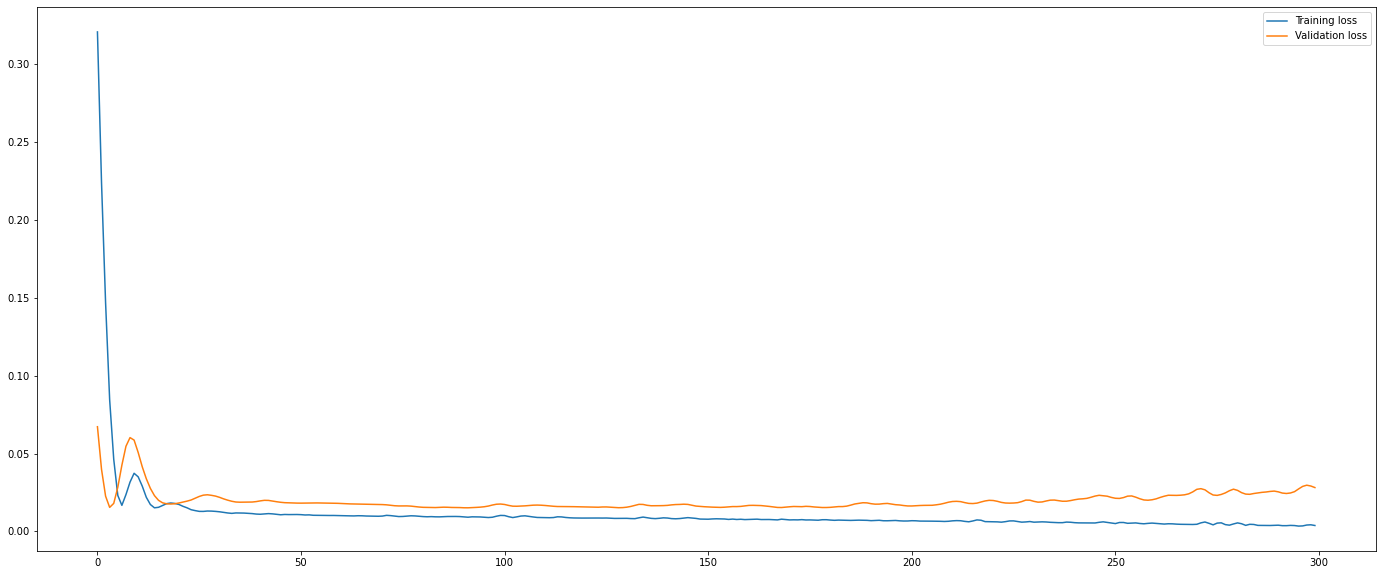

In [109]:
 #fit the model
history = model4.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_val,y_val), verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

plt.show()


In [110]:
model4.evaluate(X_val,y_val)

1/1 [==============================] - 0s 0s/step - loss: 0.0282 - root_mean_squared_error: 0.1679


[0.028189580887556076, 0.1678975373506546]

In [111]:
model4.evaluate(X_test,y_test)


1/1 [==============================] - 0s 0s/step - loss: 0.0048 - root_mean_squared_error: 0.0690


[0.004761388525366783, 0.06900281459093094]

In [112]:
# Training data predictions & plot
train_predictions = model4.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

1/1 [==============================] - 0s 209ms/step


,Train Predictions,Actuals
0,0.995186,0.960185
1,0.891151,0.802249
2,0.833425,0.882759
3,0.746998,0.833108
4,0.862236,0.892307
5,0.858528,0.912332
6,0.815306,0.800768
7,0.690808,0.565400
8,0.610117,0.592178
9,0.497328,0.473592


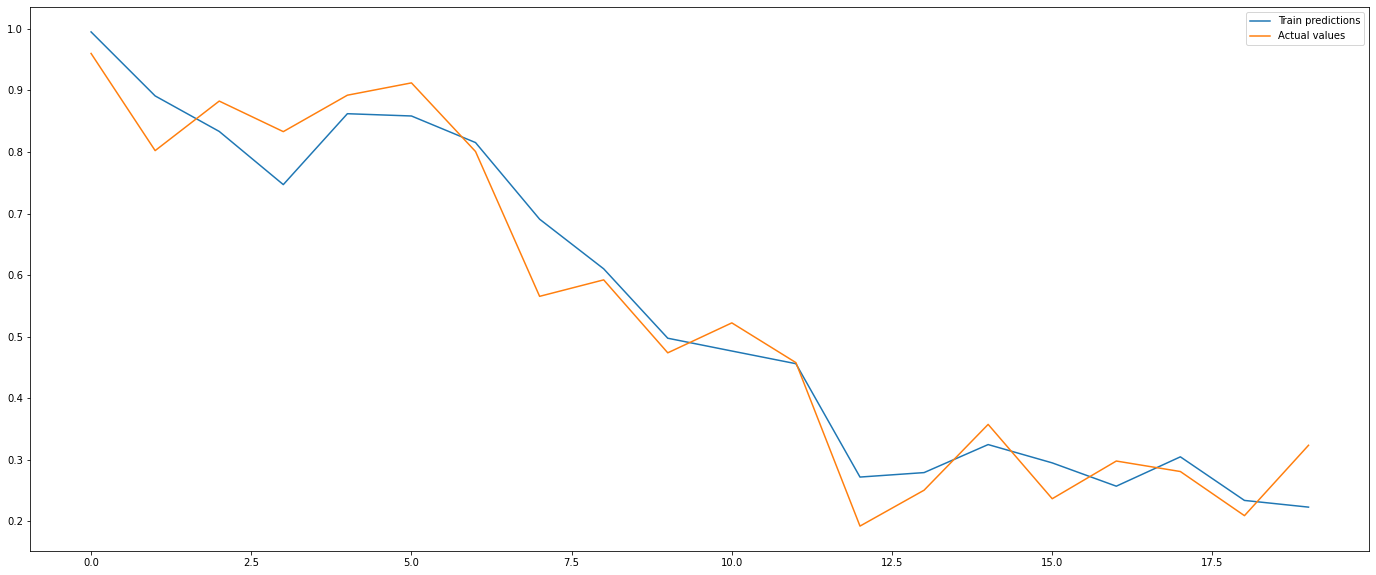

In [113]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'], label='Train predictions')
plt.plot(train_results['Actuals'], label='Actual values')
plt.legend()

In [114]:
#Validation data predictions & plot
val_predictions = model4.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

1/1 [==============================] - 0s 0s/step


,Val Predictions,Actuals
0,0.043073,0.393714
1,0.288818,0.380483
2,0.339168,0.288308
3,0.293857,0.212464
4,0.201059,0.181459


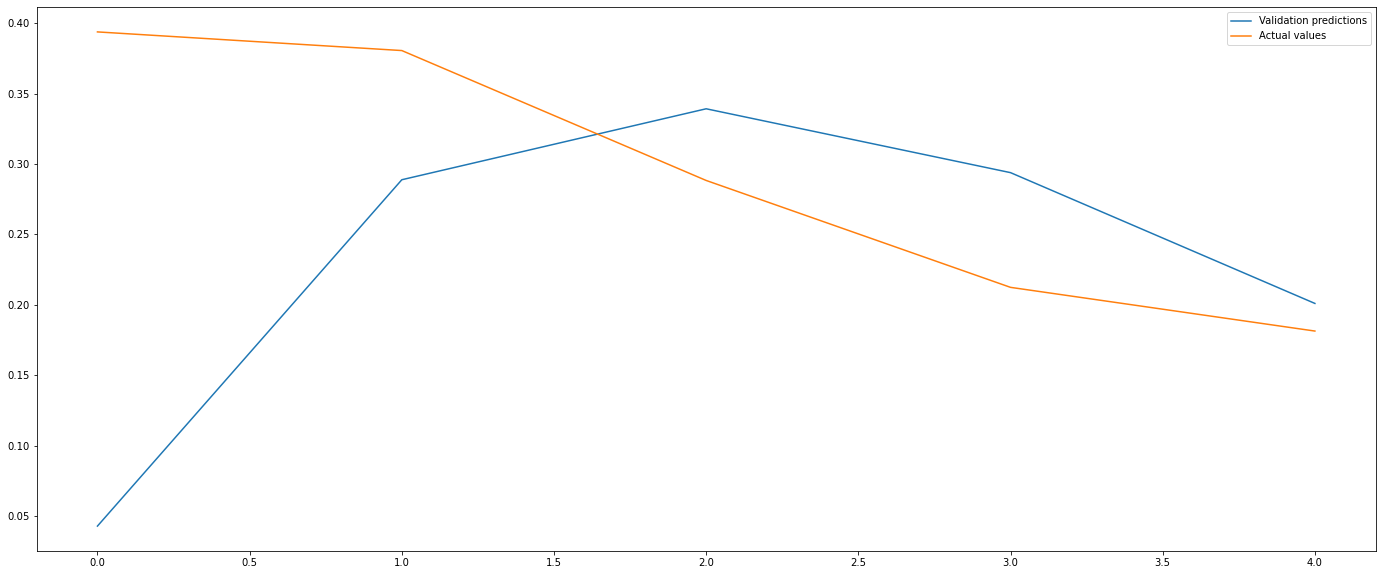

In [115]:
plt.plot(val_results['Val Predictions'], label='Validation predictions')
plt.plot(val_results['Actuals'], label='Actual values')
plt.legend()

In [116]:
# Test data predictions & plot
test_predictions = model4.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

1/1 [==============================] - 0s 0s/step


,Test Predictions,Actuals
0,0.200348,0.186125
1,0.209378,0.285288
2,0.156721,0.050704
3,0.176472,0.164600
4,0.149524,0.215333
5,0.098856,0.097118
6,0.118780,0.000000
7,0.038426,0.086416


In [117]:
data = [train_results,val_results,test_results]
result = pd.concat(data)

In [118]:
data

[    Train Predictions   Actuals
 0            0.995186  0.960185
 1            0.891151  0.802249
 2            0.833425  0.882759
 3            0.746998  0.833108
 4            0.862236  0.892307
 5            0.858528  0.912332
 6            0.815306  0.800768
 7            0.690808  0.565400
 8            0.610117  0.592178
 9            0.497328  0.473592
 10           0.476541  0.522250
 11           0.455923  0.457678
 12           0.271661  0.191976
 13           0.278921  0.250291
 14           0.324474  0.357252
 15           0.294717  0.236447
 16           0.256839  0.297720
 17           0.304534  0.280660
 18           0.233692  0.208924
 19           0.222793  0.323325,
    Val Predictions   Actuals
 0         0.043073  0.393714
 1         0.288818  0.380483
 2         0.339168  0.288308
 3         0.293857  0.212464
 4         0.201059  0.181459,
    Test Predictions   Actuals
 0          0.200348  0.186125
 1          0.209378  0.285288
 2          0.156721  0.050704
 

In [119]:
dfres = pd.DataFrame( np.concatenate( (train_results.values, val_results.values, test_results.values), axis=0 ) )
dfres.columns = ['Prediction', 'Actual']
dfres

,Prediction,Actual
0,0.995186,0.960185
1,0.891151,0.802249
2,0.833425,0.882759
3,0.746998,0.833108
4,0.862236,0.892307
5,0.858528,0.912332
6,0.815306,0.800768
7,0.690808,0.565400
8,0.610117,0.592178
9,0.497328,0.473592


In [120]:
dfres['date'] = pd.date_range(start='2022-03-29', periods=len(dfres), freq='D')

In [121]:
dfres = dfres.set_index('date')

In [122]:
dfres

,Prediction,Actual
date,,
2022-03-29,0.995186,0.960185
2022-03-30,0.891151,0.802249
2022-03-31,0.833425,0.882759
2022-04-01,0.746998,0.833108
2022-04-02,0.862236,0.892307
2022-04-03,0.858528,0.912332
2022-04-04,0.815306,0.800768
2022-04-05,0.690808,0.565400
2022-04-06,0.610117,0.592178


C:\Users\dayan\AppData\Local\Temp/ipykernel_3700/2914669531.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BTC_LSTM_market_infposneuneg3.png', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)
C:\Users\dayan\AppData\Local\Temp/ipykernel_3700/2914669531.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BTC_LSTM_market_infposneuneg3.png', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)


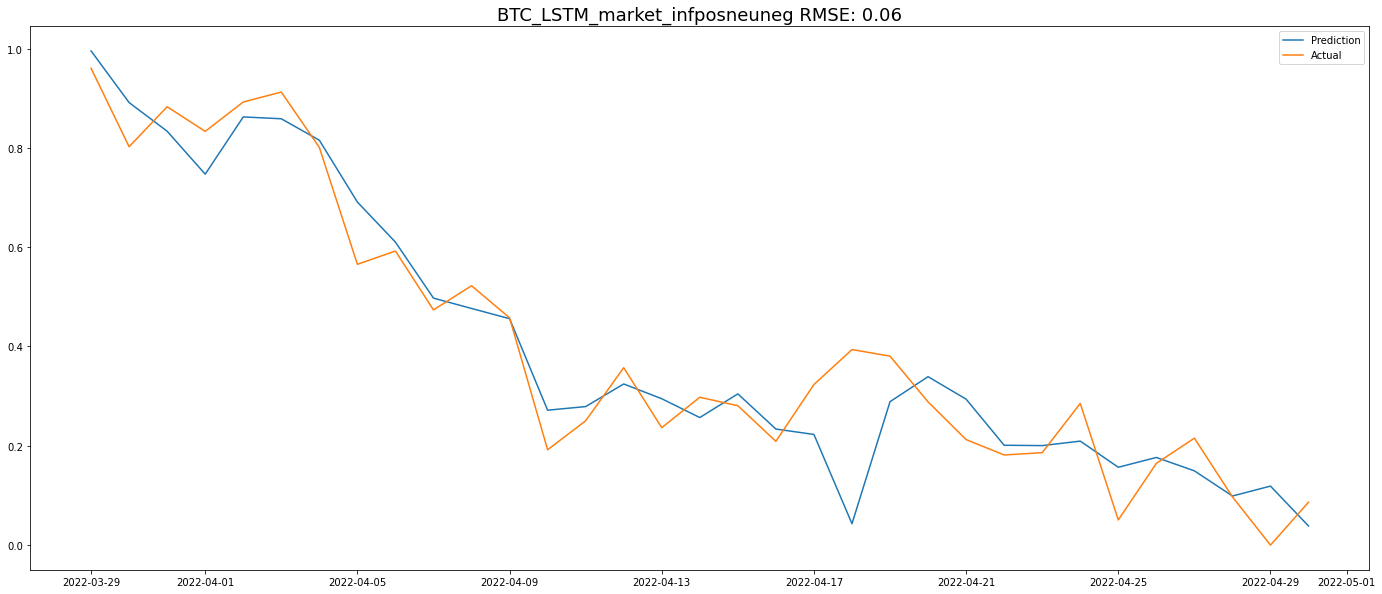

In [123]:
# Model plot
plt.rcParams['figure.figsize'] = 24,10
plt.plot(dfres['Prediction'], label = 'Prediction')
plt.plot(dfres['Actual'], label = 'Actual')
plt.title("BTC_LSTM_market_infposneuneg RMSE: 0.06", fontdict=None, position= [0.50,1.05], fontsize = 18)
plt.legend()
plt.savefig('BTC_LSTM_market_infposneuneg3.png', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)


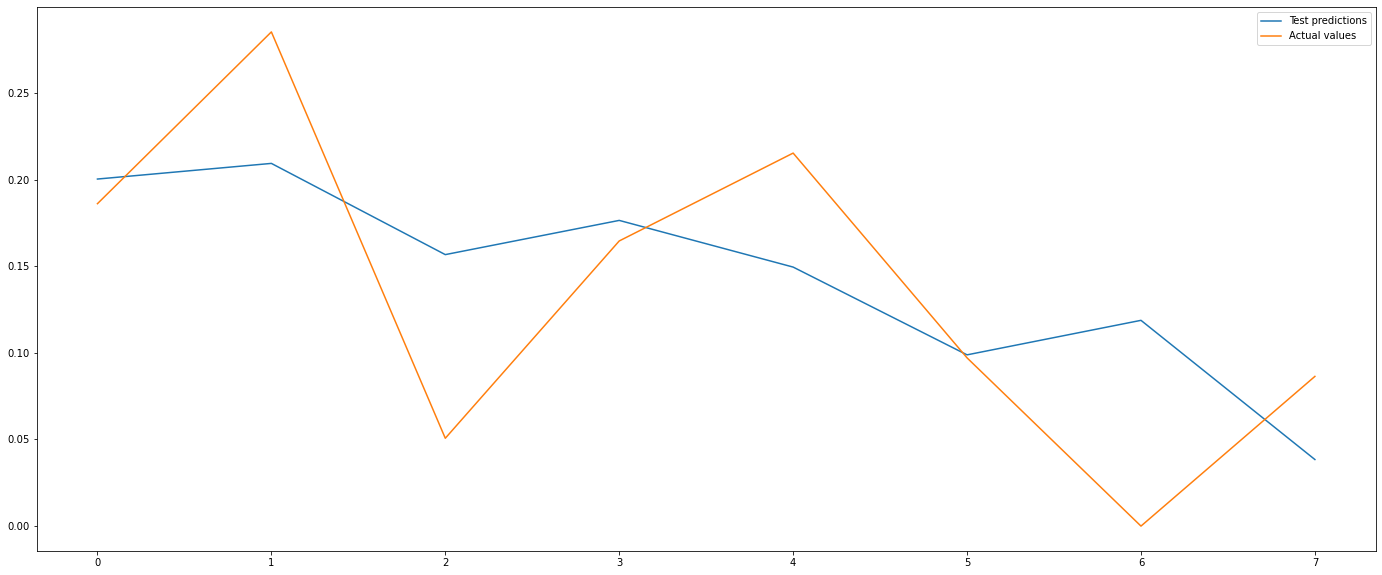

In [124]:
plt.plot(test_results['Test Predictions'], label='Test predictions')
plt.plot(test_results['Actuals'], label='Actual values')
plt.legend()

In [125]:
from sklearn.metrics import mean_squared_error as mse
# Function to return df with predicted vs actual, mse & plot
def plot_predictions1(model, X, y, start=0, end=38):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

1/1 [==============================] - 0s 0s/step


(   Predictions   Actuals
 0     0.043073  0.393714
 1     0.288818  0.380483
 2     0.339168  0.288308
 3     0.293857  0.212464
 4     0.201059  0.181459,
 0.028189580214071384)

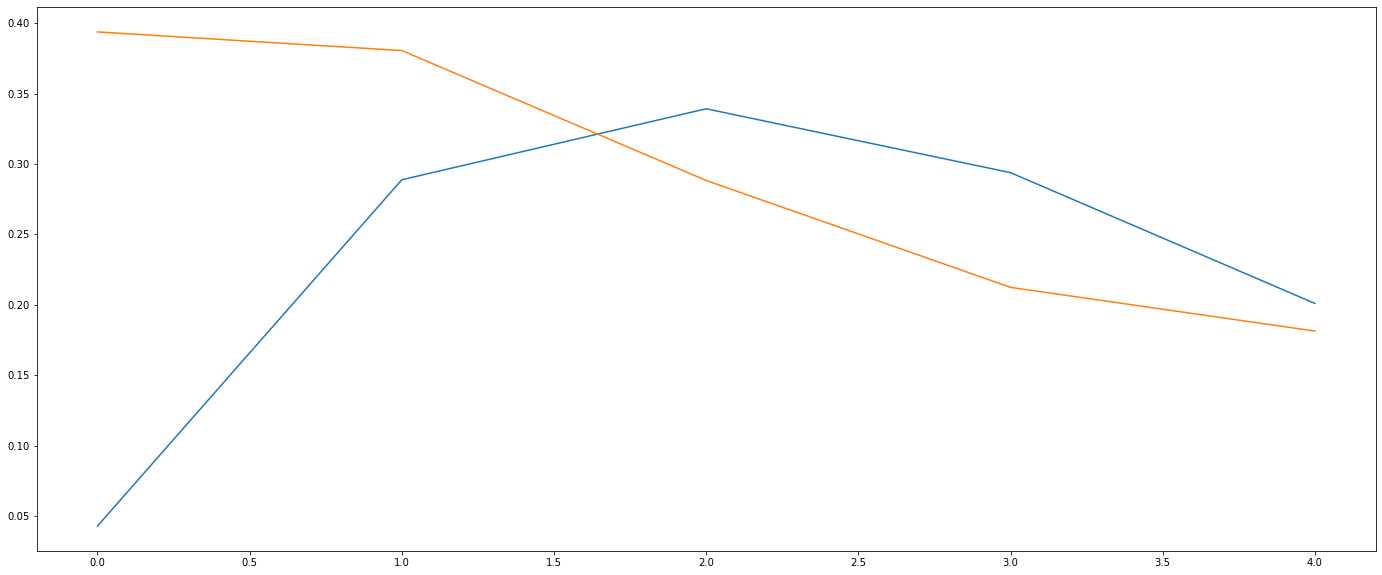

In [126]:
plot_predictions1(model4, X_val, y_val)


1/1 [==============================] - 0s 16ms/step


(   Predictions   Actuals
 0     0.200348  0.186125
 1     0.209378  0.285288
 2     0.156721  0.050704
 3     0.176472  0.164600
 4     0.149524  0.215333
 5     0.098856  0.097118
 6     0.118780  0.000000
 7     0.038426  0.086416,
 0.004761388579050307)

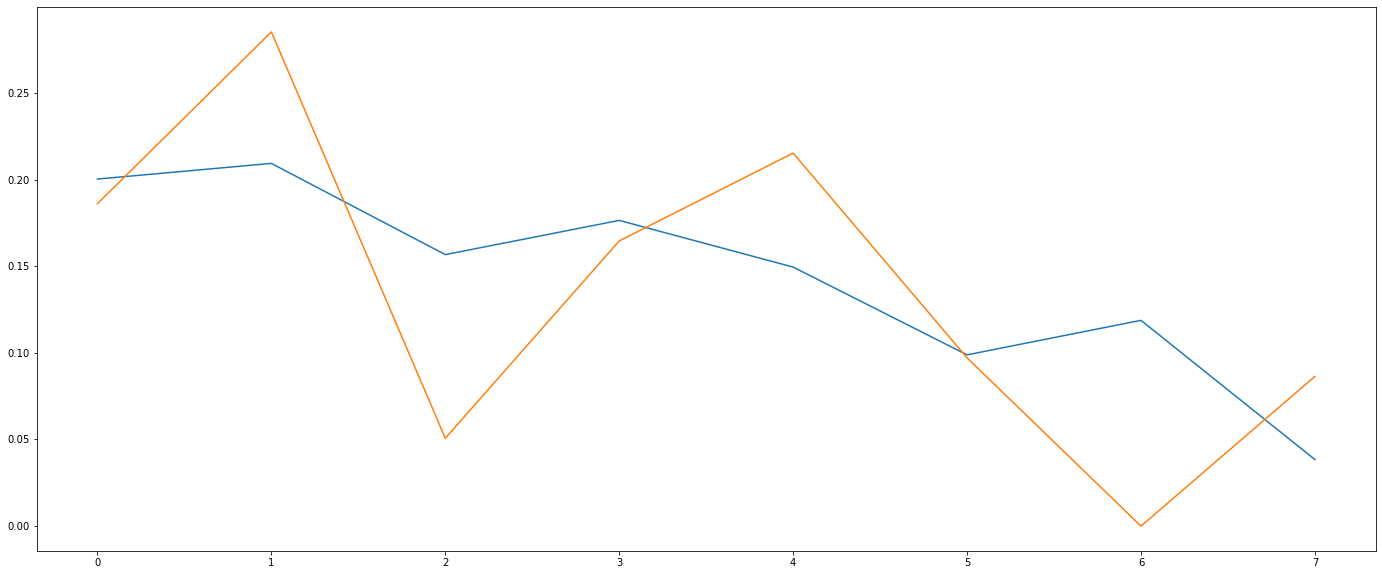

In [127]:
plot_predictions1(model4, X_test, y_test)

In [128]:

# mse, mae for training data
print('MSE: ', mean_squared_error(y_train, train_predictions))
print('MAE: ', mean_absolute_error(y_train, train_predictions))

print('RMSE: ', mean_squared_error(y_train,train_predictions, squared = False))

MSE:  0.0033146692330031217
MAE:  0.04808635703602633
RMSE:  0.0575731641739719


In [129]:
# mse, mae for testing data
print('MSE: ', mean_squared_error(y_test, test_predictions))
print('MAE: ', mean_absolute_error(y_test, test_predictions))
print('RMSE: ', mean_squared_error(y_test,test_predictions, squared = False))

MSE:  0.004761388579050307
MAE:  0.055292602045850126
RMSE:  0.0690028157327678


In [130]:
# mse, mae for validation data
print('MSE: ', mean_squared_error(y_val, val_predictions))
print('MAE: ', mean_absolute_error(y_val, val_predictions))
print('RMSE: ', mean_squared_error(y_val,val_predictions, squared = False))

MSE:  0.028189580214071384
MAE:  0.11883204166954639
RMSE:  0.16789752890996157


In [133]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [134]:
MAPE(y_test,test_predictions)

C:\Users\dayan\AppData\Local\Temp/ipykernel_3700/3631455597.py:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


inf